In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import random

def change(A,state):
    if random.random() > max(A[state]):
        return int(not(state))
    else:
        return state
    
def generate_dataset(A,B,size=1000):
    Y = []
    X = []
    state=random.randint(0,len(A)-1)
    for i in range(size):
        Y.append(state)
        X.append(np.random.randn()*B[state][1]+B[state][0])
        state=change(A,state)
    df = pd.DataFrame({'state':Y,'obs':X})
    return df

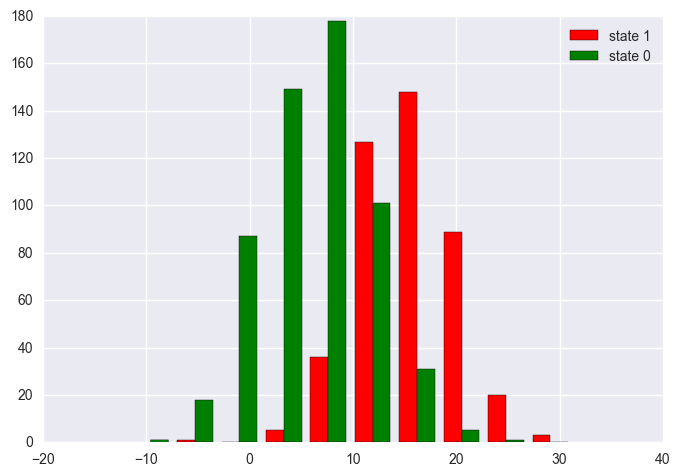

In [3]:
A = np.array([[0.7,0.3],[0.4,0.6]])
B = [[6,5],[15,5]]
df = generate_dataset(A,B)
plt.hist([df[df['state']==1].obs,df[df.state==0].obs],stacked=False, color = ['r','g'])
plt.legend(['state 1','state 0']);

In [4]:
from pydnb.dnb import DNB
hmm = DNB()
hmm.mle(df,'state');

In [5]:
pd.DataFrame(hmm.A)

,0,1
0,0.707018,0.292982
1,0.391608,0.608392


In [6]:
pd.DataFrame(hmm.B)

,0,1
,obs,obs
0,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._continuous_distns.norm_gen objec...
1,6.10163,15.2886
2,5.25651,4.72482


In [7]:
print(hmm.emission_prob(0,df.iloc[2]))
print(hmm.transition_prob(0,1))

0.0475067306888
0.29298245614
